In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
from stim_surface_code.memory import MemoryPatch
from stim_surface_code import noise

# Basic usage

In [2]:
m = MemoryPatch(5,5,5, id_offset=100)
m

--------------------------------------------------------
|    |    |Z125|    |    |    |Z126|    |    |    |    |
----------+----+--------------+----+--------------------
|    | 100|    | 101|    |L102|    | 103|    | 104|    |
----------+----+----+----+----+----+----+----+----+-----
|    |    |X127|    |Z128|    |X129|    |Z130|    |X131|
----------+----+----+----+----+----+----+----+----+-----
|    | 105|    | 106|    |L107|    | 108|    | 109|    |
-----+----+----+----+----+----+----+----+----+----------
|X132|    |Z133|    |X134|    |Z135|    |X136|    |    |
-----+----+----+----+----+----+----+----+----+----------
|    | 110|    | 111|    |L112|    | 113|    | 114|    |
----------+----+----+----+----+----+----+----+----+-----
|    |    |X137|    |Z138|    |X139|    |Z140|    |X141|
----------+----+----+----+----+----+----+----+----+-----
|    | 115|    | 116|    |L117|    | 118|    | 119|    |
-----+----+----+----+----+----+----+----+----+----------
|X142|    |Z143|    |X144|    |

In [3]:
# 10x better noise vals than Google's device
noise_params = noise.GoogleNoiseParams.improve(10)
noise_params.error_means = {
    'T1': 10**8,
    'T2': 10**8,
    'gate1_err': 1e-3,
    'gate2_err': 1e-3,
    'readout_err': 1e-3,
}

print(noise_params.error_means)
print(noise_params.error_stdevs)

{'T1': 100000000, 'T2': 100000000, 'gate1_err': 0.001, 'gate2_err': 0.001, 'readout_err': 0.001}
{'T1': 1.9999999999999998e-05, 'T2': 5e-05, 'gate1_err': 1.0000000000000002e-06, 'gate2_err': 5e-05, 'readout_err': 0.0001}


In [4]:
noise_params.set_patch_err_vals(m)

In [5]:
m.count_logical_errors()

(5.04e-05, 10000000)

In [6]:
m.get_stim()

stim.Circuit('''
    QUBIT_COORDS(2, 2) 127
    QUBIT_COORDS(2, 6) 129
    QUBIT_COORDS(2, 10) 131
    QUBIT_COORDS(4, 0) 132
    QUBIT_COORDS(4, 4) 134
    QUBIT_COORDS(4, 8) 136
    QUBIT_COORDS(6, 2) 137
    QUBIT_COORDS(6, 6) 139
    QUBIT_COORDS(6, 10) 141
    QUBIT_COORDS(8, 0) 142
    QUBIT_COORDS(8, 4) 144
    QUBIT_COORDS(8, 8) 146
    QUBIT_COORDS(0, 2) 125
    QUBIT_COORDS(0, 6) 126
    QUBIT_COORDS(2, 4) 128
    QUBIT_COORDS(2, 8) 130
    QUBIT_COORDS(4, 2) 133
    QUBIT_COORDS(4, 6) 135
    QUBIT_COORDS(6, 4) 138
    QUBIT_COORDS(6, 8) 140
    QUBIT_COORDS(8, 2) 143
    QUBIT_COORDS(8, 6) 145
    QUBIT_COORDS(10, 4) 147
    QUBIT_COORDS(10, 8) 148
    QUBIT_COORDS(1, 1) 100
    QUBIT_COORDS(3, 1) 105
    QUBIT_COORDS(5, 1) 110
    QUBIT_COORDS(7, 1) 115
    QUBIT_COORDS(9, 1) 120
    QUBIT_COORDS(1, 3) 101
    QUBIT_COORDS(3, 3) 106
    QUBIT_COORDS(5, 3) 111
    QUBIT_COORDS(7, 3) 116
    QUBIT_COORDS(9, 3) 121
    QUBIT_COORDS(1, 5) 102
    QUBIT_COORDS(3, 5) 107
    QUB

# Increasing d

In [7]:
def get_noise_params(p):
    return noise.NoiseParams(
        {
            'T1':np.inf, 
            'T2':np.inf, 
            'gate1_err':p,
            'gate2_err':p,
            'readout_err':p,
        },
    )

In [8]:
# see how to do this more efficiently in notebook 03_sinter.ipynb!
ds = [3,5,7]
ps = np.geomspace(5e-2,1e-3,5)
z_vals = np.zeros((len(ds), len(ps)))
for i,d in enumerate(ds):
    for j,p in enumerate(ps):
        m = MemoryPatch(d, d, d)
        get_noise_params(p).set_patch_err_vals(m)
        ler = m.count_logical_errors(shots=10**6, observable_basis='Z')[0]
        z_vals[i,j] = ler

In [9]:
ds = [3,5,7]
ps = np.geomspace(5e-2,1e-3,5)
x_vals = np.zeros((len(ds), len(ps)))
for i,d in enumerate(ds):
    for j,p in enumerate(ps):
        m = MemoryPatch(d, d, d)
        get_noise_params(p).set_patch_err_vals(m)
        ler = m.count_logical_errors(shots=10**6, observable_basis='X')[0]
        x_vals[i,j] = ler

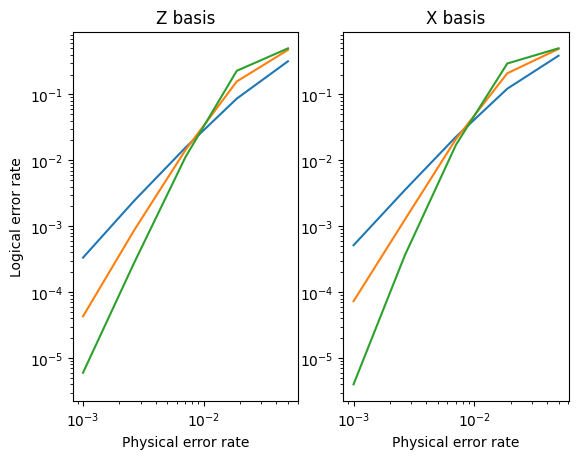

In [10]:
ax1 = plt.subplot(121)
ax1.plot(ps, z_vals.T)
ax1.loglog()
ax1.set_ylabel('Logical error rate')
ax1.set_title('Z basis')
ax1.set_xlabel('Physical error rate')

ax2 = plt.subplot(122, sharey=ax1)
ax2.plot(ps, x_vals.T)
ax2.loglog()
ax2.set_title('X basis')
ax2.set_xlabel('Physical error rate')

plt.show()